In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('housing.csv')

In [ ]:
# Creating dummies for categorical feature ocean_proximity
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [4]:
# The rooms data is represented in total rooms
df = df.drop(['total_bedrooms'], axis = 1)

In [5]:
from sklearn.preprocessing import StandardScaler
# Standrizing
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df_scaled.select_dtypes(include='number').columns] = scaler.fit_transform(df_scaled.select_dtypes(include='number'))

In [6]:
X = df_scaled.drop('median_house_value', axis = 1)
Y = df_scaled['median_house_value']

In [55]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

models = {}
scores_mse = {}
scores_r2 = {}
predictions = {}


# Splitting data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=0)
# Linear Regression
models['LR'] = LinearRegression()
models['LR'].fit(X_train, Y_train)
predictions['LR'] = models['LR'].predict(X_test)
scores_mse['LR'] = mean_squared_error(Y_test, predictions['LR'])
scores_r2['LR'] = models['LR'].score(X_test, Y_test)


# Lasso (L1)
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
lasso = GridSearchCV(lasso, params, cv=5)
lasso.fit(X_train, Y_train)
models['Lasso'] = lasso.best_estimator_
predictions['Lasso'] = models['Lasso'].predict(X_test)
scores_mse['Lasso'] = mean_squared_error(Y_test, predictions['Lasso'])
scores_r2['Lasso'] = models['Lasso'].score(X_test, Y_test)


# Ridge (L2)
ridge = Ridge()
ridge = GridSearchCV(ridge, params, cv=5)
ridge.fit(X_train, Y_train)
models['Ridge'] = ridge.best_estimator_
predictions['Ridge'] = models['Ridge'].predict(X_test)
scores_mse['Ridge'] = mean_squared_error(Y_test, predictions['Ridge'])
scores_r2['Ridge'] = models['Ridge'].score(X_test, Y_test)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_28216\1285474158.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores_mse.keys(), y=scores_mse.values(), palette='viridis', ax=axes[0])
C:\Users\ahmad\AppData\Local\Temp\ipykernel_28216\1285474158.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores_r2.keys(), y=scores_r2.values(), palette='viridis', ax=axes[1])


Text(0, 0.5, 'R2')

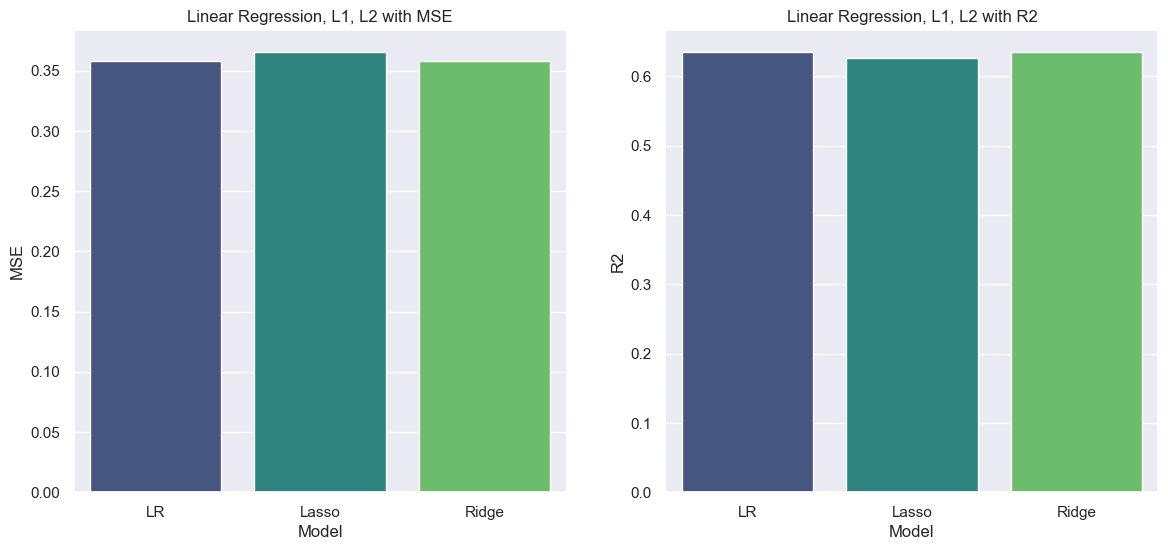

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot MSE
sns.barplot(x=scores_mse.keys(), y=scores_mse.values(), palette='viridis', ax=axes[0])
axes[0].set_title("Linear Regression, L1, L2 with MSE")
axes[0].set_xlabel("Model")
axes[0].set_ylabel("MSE")


# Plot R2
sns.barplot(x=scores_r2.keys(), y=scores_r2.values(), palette='viridis', ax=axes[1])
axes[1].set_title("Linear Regression, L1, L2 with R2")
axes[1].set_xlabel("Model")
axes[1].set_ylabel("R2")


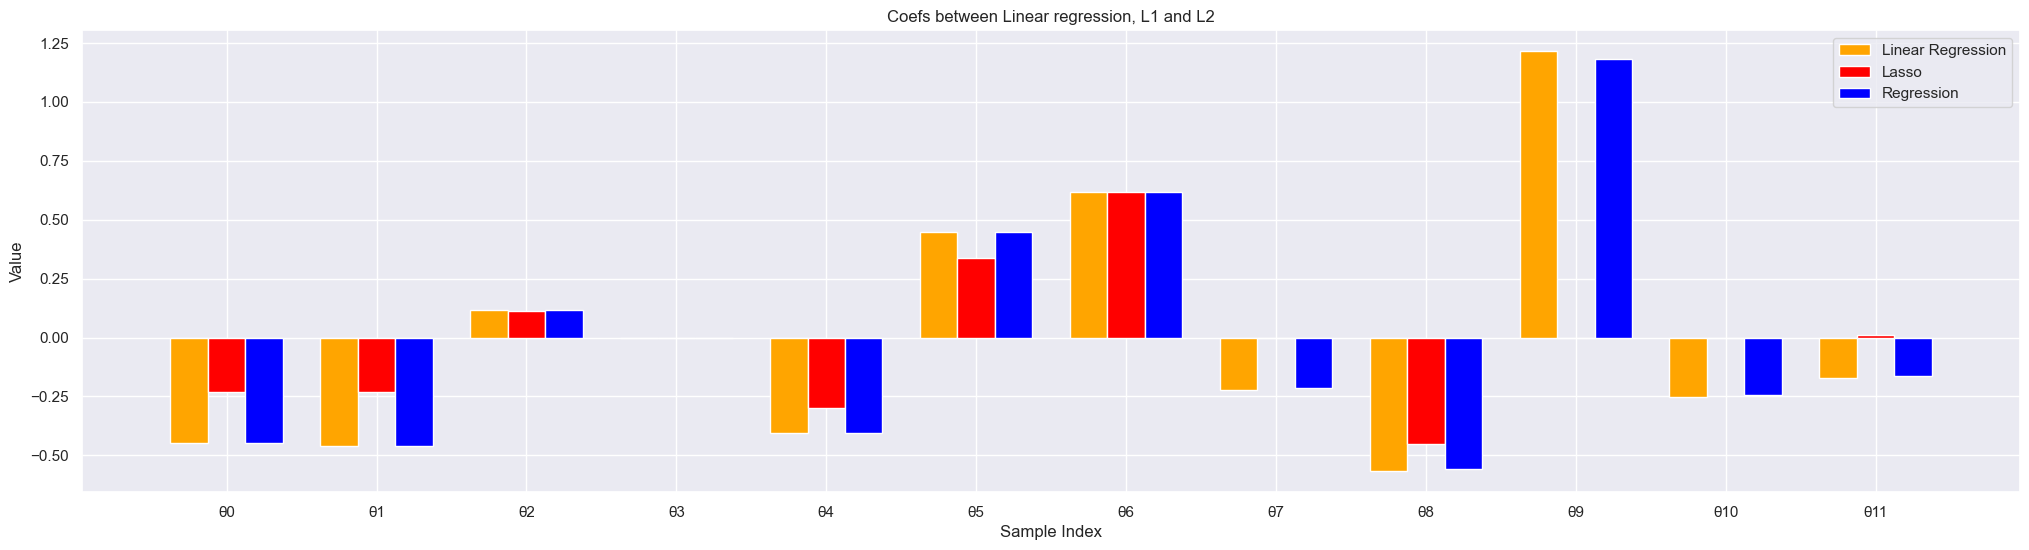

In [72]:
plt.figure(figsize=(25, 6))

bar_w = 0.25
x = np.arange(len(models['LR'].coef_))
plt.bar(x-bar_w, models['LR'].coef_, width=bar_w, label="Linear Regression", color='orange')
plt.bar(x, models['Lasso'].coef_, width=bar_w, label="Lasso", color='red')
plt.bar(x+bar_w, models['Ridge'].coef_, width=bar_w, label="Regression", color='blue')
plt.xticks(x, [f'θ{int(coef)}' for coef in x])
plt.title("Coefs between Linear regression, L1 and L2")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()